In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 4 : Algorithmique</center></span>

## Introduction

**Si on ne peut guère faire de l'informatique sans algorithmique, l'inverse n'est pas vrai.** D'ailleurs, le plus ancien algorithme (non trivial) connu est souvent attribué au mathématicien grec *Euclide*, il y a environ 2300 ans, bien longtemps avant l'idée même d'ordinateur. Nous y reviendrons un peu plus loin ... De plus, nous utilisons fréquemment des **algorithmes en dehors de l'informatique**, lorsque nous conduisons une voiture par exemple.

Le mot **algorithme** vient du nom d'un mathématicien perse du IXème siècle nommé *Muhammad Ibn Mūsā al-Khuwārizmī*. Le mot **algèbre**, quant à lui, est tiré du titre de son principal ouvrage qui, quelques siècles plus tard, influencera grandement tous les mathématiciens de l'europe médiévale. On le considère aujourd'hui souvent comme le "*père de l'algèbre*".


## A. Principes d'algorithmique

### I. Programme officiel
|Contenus | Capacités attendues|
|:-|:-:|
|Parcours séquentiel d’un tableau| Écrire un algorithme de recherche d’une occurrence sur des valeurs de type quelconque. Écrire un algorithme de recherche d’un extremum, de calcul d’une moyenne.|
|Tris par insertion, par sélection|Écrire un algorithme de tri. Décrire un invariant de boucle qui prouve la correction des tris par insertion, par sélection.|
|Algorithme des k plus proches voisins|Écrire un algorithme qui prédit la classe d’un élément en fonction de la classe majoritaire de ses k plus proches voisins.|
|Recherche dichotomique dans un tableau trié | Montrer la terminaison de la recherche dichotomique à l’aide d’un variant de boucle.|
|Algorithmes gloutons|Résoudre un problème grâce à un algorithme glouton.|

### II. Qu'est-ce qu'un algorithme ?

Un **algorithme** est comparable à un **protocole** pour les sciences expérimentales ou à une **recette de cuisine** pour la gastronomie. Si, comme pour un protocole ou une recette, il suffit d'un papier et d'un crayon pour écrire un algorithme, on peut par contre le mettre directement en oeuvre sur sa feuille, sans l'aide d'un ordinateur (à condition qu'il ne soit pas trop compliqué). Alors que bien sûr, cela n'aurait pas de sens pour un protocole ou une recette.

#### 1. Définition

Les définitions d'un algorithme sont nombreuses mais on peut par exemple retenir :

Un **algorithme** est une **suite finie d'opérations élémentaires** obéissant à une **enchaînement déterminé** et produisant en **sortie un résultat souhaité**, le plus souvent à partir des **données fournies en entrée**.

On peut le schématiser de la façon suivante :

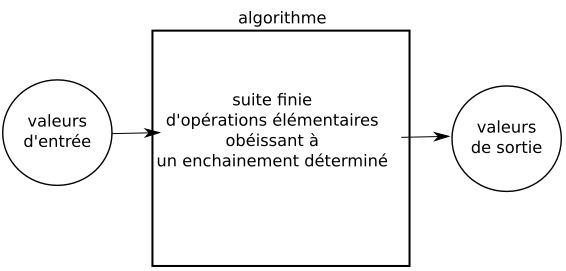

**Remarque :** La traduction d'un même algorithme peut se faire dans différents langages de programmation : on parle **d'implémentation**. Mais sauf erreur de programmation, il donnera les mêmes résultats quelque soit le langage. Par contre, l'implémentation peut être plus ou moins aisée et son exécution plus ou moins efficace, selon le langage choisi. 

#### 2. La notion d'opération élémentaire

Par définition, une **opération élémentaire** est une opération **simple, compréhensible facilement par n'importe qui**. Mais en réalité, cette simplicité est assez **subjective**. Le problème est le même avec un protocole de sciences ou une recette de cuisine :

L'action de "peser" est le plus souvent considéré comme une opération élémentaire et par conséquent, on ne détaille en général pas l'utilisation de la balance (tarage, récipients utilisés, ...). Mais cela n'aura pourtant rien d'évident si c'est un enfant de 5 ans qui lit la recette. A l'opposé, "monter des oeufs en neige" pourra passer pour une opération élémentaire pour un cuisinier expérimenté mais laisser désemparé un débutant.

Pour revenir à l'algorithmique, là aussi **tout dépend du contexte**.

Si on veut décrire un algorithme permettant de trier une liste de valeurs, alors "trier la liste" n'est évidemment pas une opération élémentaire, sinon l'algorithme serait juste constitué de l'instruction "trier la liste" et donc sans intérêt.

Par contre, "trier une liste" pourrait très bien constituer une opération élémentaire dans un algorithme beaucoup plus complexe dont le tri ne serait qu'une étape parmis bien d'autres.

En ce qui nous concerne, nous étudierons des **algorithmes relativement simples** dans lesquels les **opérations élémentaires** seront essentiellement :
- les **opérations** (addition, soustraction, multiplication, division, concaténation, ...)
- les **affectations** (modification de la valeur d'une variable)
- les **modifications de variables de types construits** (ajout et suppression d'un élément, modification d'une valeur, ...)
- les **tests booléens** utilisés dans les structure conditionnelles (comparaison, égalité, présence)

En dehors du problème des boucles, cela revient, à peu de chose près, à **une opération élémentaire par ligne de code**.

#### 3. Multiplicité des algorithmes

En cuisine, il existe plusieurs recettes de gateaux au chocolat. Le choix de la recette peut dépendre du temps qu'on a à y consacrer, de son niveau en cuisine, du contexte dans lequel on cuisine (familial ou professionnel, quotidien ou évènement, ...) mais aussi des ustensiles dont on dispose et de l'argent que l'on peut y mettre.

Il en va de même pour un algorithme en informatique : **il existe plusieurs algorithmes capables de résoudre le même problème**. Parmi tous les algorithmes qui **donnent le résultat voulu** (on veut un gateau au chocolat, pas une mousse de fruits,) **on essaiera de choisir celui qui est le plus adapté à la situation**.

Il n'y en a pas forcément un meilleur que tous les autres, qui n'aurait que des avantages et aucun inconvénient. Et puis on peut toujours se tromper ...


### III.  Le pseudo-langage

Un pseudo-langage sert à **écrire un algorithme sans l'implémenter dans un langage informatique** en particulier. Il permet de décrire les opérations élémentaires qui le constituent dans un **langage compréhensible par tous**.

Le pseudo-langage n'est **pas normalisé**, chacun peut le faire un peu à sa façon mais il y a quand même quelques conventions à suivre.

#### 1. Conventions pour écrire du pseudo-code

**La structure :**
- **une seule instruction** par ligne.
- Ajout d'une **indentation** à chaque fois qu'on commence un **nouveau bloc** (fonction ou structure conditionnelle).
- Essayer de faire **ressortir la structure** logique en mettant les instructions "Pour", "Si", "Tant que", "Fonction", ... en **gras ou majuscules**.

**Les variables :**
- Elles sont **déclarées au début du code** en indiquant leur **type** (int, float, bool, str, ...).
- Elles ont un **nom le plus explicite possible** qui ne **commence pas par un chiffre** et dont les parties sont séparées soit par "_", soit par des majuscules; on **évite les caractères accentués**.

**Les affectations :**
- On utilise le symbole $\leftarrow$, par exemple **$a \leftarrow 2$ signifie qu'on affecte la valeur $2$ à la variable $a$**.

**Les fonctions :**
- Elles dont déclarées en précisant leur **nom et leurs paramètres entre parenthèses**.

#### 2. Exemple du PGCD

**Définition :**

En arithmétique élémentaire, le *plus grand commun diviseur* ou **PGCD** de deux nombres entiers non nuls est le **plus grand entier qui les divise simultanément**.

La **méthode la plus naturelle**, mais aussi la plus longue (on parle de méthode naïve), pour trouver le PGCD de a et b est de chercher tous les diviseurs de a et tous ceux de b puis de les comparer afin de trouver le plus grand diviseur qui soit commun aux deux.

Cherchons pas exemple le PGCD de 385 et 210.  
Les diviseurs de 385 sont (385, 77, 55, **35**, 11, 7, 5, 1) et ceux de 210 sont (210, 105, 70, 42, **35**, 30, 21, 15, 14, 10, 7, 6, 5, 3, 2, 1).  
Leur PGCD est donc égal à 35.

Cela correspond au pseudo-code suivant (on suppose que a > b pour simplifier, sinon il faut échanger a et b au début de la fonction) :

**Fonction** PGCD_naif (a,b)
> *list* : diviseurs_de_a, diviseurs_de_b  
>i $\leftarrow$ a  
>**Tant que** i > 0 **faire**
>>**Si** a *mod* i = 0 **alors**  
>>// mod=modulo=reste de la division entière
>>>*Append* i à diviseurs_de_a    
>>>// on cherche tous les diviseurs de a par ordre décroissant
>>
>>i $\leftarrow$ i-1  

>i $\leftarrow$ b
>
>**Tant que** i > 0 **faire**
>>**Si** b *mod* i = 0 **alors**
>>>*Append* i à diviseurs_de_b     
>>>// on cherche tous les diviseurs de b par ordre décroissant
>>
>>i $\leftarrow$ i-1
>
>**Pour** div *dans* diviseurs_de_b **faire**  
>// on cherche si les diviseurs de b (en commencant par b) sont aussi des diviseurs de a 
>>**Si** div *dans* diviseurs_de_a **alors**     
>>>*Retourner* div

**Exercice d'application :** Ecrire cet algorithme en Python et le tester.

In [3]:
def PGCD_naif (a,b) :
    diviseurs_de_a=[]
    diviseurs_de_b=[]
    i=a
    while i > 0 :
        if a%i ==0 :
            diviseurs_de_a.append(i)
        i=i-1
    i=b
    while i > 0 :
        if b%i ==0 :
            diviseurs_de_b.append(i)
        i=i-1
    for div in diviseurs_de_b :
        if div in diviseurs_de_a :
            return div
print(PGCD_naif(385,210))
print(PGCD_naif(385,35))
print(PGCD_naif(210,385))
print(PGCD_naif(35,385))
print(PGCD_naif(47,13))
print(PGCD_naif(385,1))
print(PGCD_naif(385,0))

35
35
35
35
1
1
None


Cette méthode est assez **simple à comprendre** et **pas très compliquée à écrire** (bien qu'un peu longue).

Par contre, elle n'est **pas très efficace dès que les nombres a et b sont grands** car il faut d'abord chercher tous les diviseurs de chacun puis les comparer un par un pour trouver le plus grand qu'ils aient en commum. En particulier, si les **deux nombres sont premiers entre eux**, 1 est leur seul diviseur commun et il va donc falloir parcourir les listes en entier avant de pouvoir conclure. C'est ce qu'on appelle le **pire cas**.

Heureusement, il existe d'autres méthodes, c'est-à-dire **d'autres algorithmes**, bien **plus efficaces**.

#### 3. Recherche du PGCD par soustraction

Dans cet algorithme, on commence par soustraire le plus grand des deux nombres (disons a) par le plus petit (b donc). Puis on soustrait ce résultat au plus petit des deux premiers nombres ou l'inverse si le résultat est négatif. Puis on recommence jusqu'à arriver à zéro. Les deux derniers chiffres (dont la soustraction vaut zéro) sont le PGCD.

Avec le même exemple que précédemment, cela donne :  
385 - 210 = 175  
210 - 175 = 35  
175 - 35 = 140  
140 - 35 = 105  
105 - 35 = 70  
70 - 35 = 35  
35 - 35 = 0  
PGCD (385, 210) = 35

Soit, en pseudo-code :  
 **Fonction** PGCD_soustraction (a,b)
> u $\leftarrow$ a  
> v $\leftarrow$ b  
> **Tant que** u $\ne$ v **faire**  
>> **Si** u > v **alors**
>>> u $\leftarrow$ u - v
>>
>> **Sinon**  
>>> v $\leftarrow$ v - u
>
> **Retourner** u  

Cet algorithme est **très simple à écrire** mais il n'est **pas évident de comprendre pourquoi il fonctionne**.

Il n'y a pas de longue liste à parcourir mais on voit que le nombre de tours de boucles peut très vite augmenter, en particulier dans le **pire cas où a et b sont très différents** (essayer a = 385 et b = 2 par exemple). Il n'est donc **pas non plus très efficace**.

**Exercice d'application :** Ecrire cet algorithme en Python et le tester.

In [4]:
def PGCD_soustraction (a,b) :
    u=a
    v=b
    while u != v:
        if u > v :
            u=u-v
        else :
            v=v-u
    return u

print(PGCD_soustraction(385,210))
print(PGCD_soustraction(385,35))
print(PGCD_soustraction(210,385))
print(PGCD_soustraction(35,385))
print(PGCD_soustraction(47,13))
print(PGCD_soustraction(385,1))

35
35
35
35
1
1


#### 4 Recherche du PGCD par décomposition en produit de facteurs premiers

Dans cet algorithme, on commence par écrire a et b comme un **produit de nombres premiers**. Le PGCD est alors égal au **produit des facteurs communs aux deux décompositions**.

Avec le même exemple que précédemment, cela donne :  
385 = **5** × **7** × 11  
210 = 2 × 3 × **5** × **7**  
PGCD (385, 210) = 7 × 5 = **35**

Commençons par écrire en pseudo-code une fonction qui renvoit la décomposition en produit de facteurs premiers :  

**Fonction** facteurs_premiers (n)
> *//n doit être > 1*  
> *list* : facteurs  
> *bool* : premier  
> premier $\leftarrow$ Faux  
> temp $\leftarrow$ n  
> **Tant que** premier = Faux **faire**
>> i $\leftarrow$ 2  
>> **Tant que** (temp *mod* i) $\ne$ 0 **faire**  
>>> i $\leftarrow$ i + 1  
>>*// on cherche le premier entier >= 2 qui divise temp*
>>
>> *Append* i *à* facteurs  
>> *// on a trouvé un diviseur, on l'ajoute à la liste des facteurs*
>>
>> **Si** i = temp **alors**
>>> premier = Vrai  
>> *// premier devient vrai si on a trouvé aucun diviseur en dehors de temp lui-même*
>>
>> **Sinon**
>>> temp $\leftarrow$ temp DIV i  
>> *// on remplace temp par le résultat de la division entière (DIV) de temp par i et on recommence*
>
> **Retourner** facteurs

Voici à présent la fonction pour le PGCD :

**Fonction** PGCD_premiers (a,b)  
> *list* : facteurs_communs  
> *int* : result  
> facteurs_de_a $\leftarrow$ facteurs_premiers(a)  
> facteurs_de_b $\leftarrow$ facteurs_premiers(b)  
> *// dans facteurs_de_a et facteurs_de_b, les facteurs premiers sont rangés par ordre croissant en partant de 2*  
> i $\leftarrow$ 0  
> *// cette première boucle parcourt les facteurs de a*  
> **Pour** fac *dans* facteurs_de_a **faire**
>> *// cette deuxième boucle parcourt les facteurs de b*  
>> **Tant que** (i < *longueur*(facteurs_de_b)) **faire**  
>>> **Si** fac < facteurs_de_b\[i\] **alors**  
>>>> **BREAK**  
>>>> *//on passe au facteur suivant de a mais on reste sur le même facteur de b*  
>>>
>>> **Si** fac = facteurs_de_b\[i\] **alors**  
>>>> *Append* fac *à* facteurs_communs  
>>>> i $\leftarrow$ i + 1  
>>>> **BREAK**  
>>>> *//on a trouvé un facteur commun, on passe au facteur de a et de b suivants*
>>>
>>> **Si** fac > facteurs_de_b\[i\] **alors**  
>>>> i $\leftarrow$ i + 1  
>>>> *// on passe au facteur de b suivant sans changer de facteur de a*
>
> result $\leftarrow$ 0  
> *// le PGCD est le produit de tous les facteurs communs*  
> **Pour** fac *dans* facteurs_communs **faire**  
>> result=result × fac  
>
> **Retourner** result  

In [ ]:
def facteursPremiers(n):
    #n doit être >1
    facteurs=[]
    premier=False
    temp=n
    while premier = False:
        i=2
        while (temp%i) != 0:
            i+=1
            #On cherche le premier entier >=2 qui divise temp
        facteurs.append(i)
        #On a trouvé un diviseur

Cet algorithme est **bien plus compliqué à écrire** mais son **principe est assez simple à comprendre et à démontrer**.

Son **efficacité diminue aussi quand les nombres augmentent** mais par contre, il est **assez régulier** dans le sens où son exécution de dépend pas tellement d'éventuels pires cas.

De plus, on peut **facilement l'améliorer** en ne testant la divisibilité que par les nombres dans la recherche de facteurs premiers (ça ne sert à rien d'essayer de diviser par 4 si on a déjà essayé de diviser 2 fois par 2).

Enfin, il présente l'avantage de trouver au passage la **décomposition en facteurs premiers de a et b**, ce qui peut s'avérer très utile dans d'autres applications.

**Exercice d'application :** Ecrire ces 2 fonctions en Python et les tester.

In [5]:
def facteurs_premiers(n):
    ...
    
def PGCD_premiers (a,b) :
    ...

#### 5. Recherche du PGCD par division

Cet algorithme est celui **d'Euclide**. On commence par effectuer la division entière du plus grand (toujours a) par le plus petit (encore b). Puis on effectue la division entière du plus petit des deux premiers nombres (le diviseur précédent) par le reste de cette première division. On recommence jusqu'à ce que le reste soit égal à zéro. Le PGCD est alors égal au dernier diviseur obtenu.

Avec le même exemple que précédemment, cela donne :  
385 / **210** = 1 reste *175*  
210 / **175** = 1 reste *35*  
175 / **35** = 5 reste *0*  
PGCD (385, 210) = **35**

Soit en pseudo-code (toujours pour a > b) :

**Fonction** PGCD_euclide (a,b)
> *int* : reste  
> u $\leftarrow$ a  
> v $\leftarrow$ b  
> reste $\leftarrow$ b  
> **Tant que** reste $\ne$ 0 **faire**  
>> reste $\leftarrow$ u *mod* v  
>> **Si** reste = 0 **alors**
>>> **Retourner** v
>>
>> **Sinon**  
>>> u $\leftarrow$ v  
>>> v $\leftarrow$ reste

Ce dernier algorithme est **simple à écrire et plutôt efficace quelques soient les cas**, même si, forcément, son **efficacité diminue aussi avec les grands nombres**.

La démonstration mathématique de son **principe n'est pas trop compliquée** si on sait que pgcd(a, b) = pgcd(b, r) où r est le reste de la division entière de a par b (lemme d'Euclide).

Il peut aussi se programmer de manière **récursive** mais vous verrez ça l'année prochaine. ;)

A noter enfin que c'est en réalité une amélioration de l'algorithme par soustraction vu au 3, qui est d'ailleurs parfois considéré comme la version originale de l'algorithme d'Euclide.

**Exercice d'application :** Ecrire cet algorithme en Python et le tester.

In [6]:
def PGCD_euclide (a,b) :
    ...

### IV. Qu'est-ce qu'un bon algorithme ?

Un __bon algorithme__ doit :
- se terminer **sans rester coincé dans une boucle infinie** : c'est la **terminaison**.
- donner le **bon résultat** : c'est la **correction**.
- être efficace, c'est-à-dire s'exécuter dans un **temps raisonnable sans prendre trop de place en mémoire** : c'est la **complexité**.

#### 1. Ce que font les "mauvais" algorithmes

**La boucle infinie :**
Quand un algorithme entre dans une boucle infinie, il peut ne jamais terminer sans qu'il ne se passe rien d'autre de spécial. Mais il peut aussi arriver que les grandeurs calculées "explosent", c'est-à-dire augmentent indéfiniment ...
D'une certaine manière, c'est ce qu'il s'est passé lorsque le prix d'un **livre sur les mouches, vendu sur Amazon en 2011, a atteint la somme record de 23,7 millions de $**. L'histoire est racontée [ici](http://www.michaeleisen.org/blog/?p=358).

**L'erreur dans le résultat :**
En 1999, la **sonde Mars Climate Orbiter**, envoyée par la NASA **se crash à cause d'un bête problème de conversion** entre les unités américaines (pied, pouce) et le système métrique. Voir [ici](https://www.letemps.ch/societe/coup-pouce-chuter-sonde-mars-orbiter).

**Mauvaise gestion de la place en mémoire :**
En 1996, le **premier vol d'essai d'Ariane V se solde par une explosion** un peu plus de 30 secondes après le décollage. Cette explosion est due à un **dépassement d'entier** (valeur trop grande par rapport à ce qui était prévu) dans le programme du calculateur de vol. Voir [ici](https://fr.wikipedia.org/wiki/Vol_501_d%27Ariane_5).

Pour plus d'histoires sur les "bug" célèbres de l'informatique :
- [un site fourni mais un peu ancien](http://tisserant.org/cours/qualite-logiciel/qualite_logiciel.html)
- [un site plus récent mais en anglais](https://www.wired.com/2005/11/historys-worst-software-bugs/)


#### 2. Prouver la terminaison

**Définition de la terminaison :** Un algorithme se termine, si son exécution sur machine **s’arrête toujours** quelque soit la nature des données en entrée.

Comme indiqué précédemment, pour **prouver la terminaison**, il faut **prouver qu'on ne peut pas se trouver dans une boucle infinie**. Si le programme ne comporte **pas de boucle ou alors seulement des boucles `for`**, on peut considérer que **la terminaison va de soi**. Par contre, dès qu'on utilise une **boucle `while`**, il faut **s'assurer que la condition de sortie de la boucle puisse être remplie** à un moment ou à un autre.

Pour prouver la terminaison d'une boucle `while`, il faut trouver un **variant de boucle**, c’est-à-dire **une variable** ou une **expression mathématique constituée à partir des variables** du programme, qui **varie au cours des itérations** de la boucle. Il faut ensuite montrer que ce **variant de boucle converge en un nombre fini d'étapes vers une valeur qui satisfait la condition de sortie de la boucle**.

Le plus souvent, la condition de sortie de boucle est de la forme `expression > a` ou `expression < a` où `a` est un nombre et `expression` est un variant de boucle qui prend des valeurs entières. Il suffit alors de montrer que les valeurs de `expression` forment une suite strictement décroissante ou croissante pour prouver la terminaison.

**Exemple :**
```
x = 0
while x ** 2 < a :
    x = x + 1
```
Si `a <= 0` alors la boucle n'est pas exécutée du tout.

Si `a > 0` alors les valeurs de `x**2` forment une suite strictement croissante de la forme 0, 1, 4, 9, 16, ... qui deviendra nécessairement supérieure ou égale à `a` en un nombre fini d'étapes, quelque soit la valeur de `a > 0`. Cet algorithme se termine donc quoiqu'il arrive.

**Exercice :**
Prouver la terminaison des algorithmes `PGCD_naif`, `PGCD_soustraction`, `PGCD_premiers` et `PGCD_euclide` vus précédemment.

#### 3. Prouver la correction

**Définition de la correction :**
Un algorithme est correct, si son exécution sur machine **donne toujours le bon résultat** quelque soit l’entrée.

Là encore, la preuve de la correction pose surtout problème en présence de boucles (`for`ou `while`). On démontre alors la correction **par récurrence** :
- si le résultat est correct avant d'entrer dans la boucle,
- et si on peut montrer qu'il reste correct après un passage par la boucle (une itération),
- alors il sera aussi correct à la fin de la boucle.

On dit alors que la propriété "le résultat est correct" est un **invariant de boucle**.

**Remarque :** On peut valider autant de tests que l'on veut mais on ne pourra jamais savoir si le test suivant n'aurait pas échoué. **Faire des tests ne prouve jamais la correction**.

**Exemple :**
```
def mult(a,b) : # a et b sont des entiers naturels
    m = 0
    p = 0
    while m < a :
        m = m + 1
        p = p + b
    return p
```
___On veut montrer que cette fonction renvoie bien le produit $a\times b$.___

Pour cela, on choisit comme invariant de boucle la propriété "$p=m\times b$".

___Avant d'entrer dans la boucle :___ $m = p = 0$ et donc $p=m\times b$ est vrai, quelque soit la valeur de b.

___Après une itération :___ Notons $(m,p)$ et $(m',p')$ les valeurs de ces variables avant et après une itération. Comme on suppose que la propriété est vraie avant itération, on a $p=m\times b$. Par ailleurs, d'après l'algorithme, on sait que $m'=m+1$ et $p'=p+b$. En remplaçant $p$ par $m\times b$ dans cette dernière expression, on obtient : $p'=m\times b+b = (m+1)\times b = m' \times b$ puisque $m'=m+1$. La propriété reste donc vraie après une itération.

___A la fin de la boucle :___ D'après ce qui précéde, la propriété $p=m\times b$ est donc toujours vraie à la sortie de la boucle.

Or, dans la boucle $m$ est incrémentée de 1, tant que $m < a$. On sort donc de la boucle quand $m = a$ et la propriété peut donc se réécrire, en sortie de boucle, $p=a\times b$. Enfin, puisque c'est $p$ qui est retournée par la fonction, cette fonction est correcte et retourne bien le produit $a \times b$.

**Exercice :**

Sachant qu'un théorème mathématique nous assure que $PGCD(u,v)=PGCD(u-v,v)=PGCD(u,v-u)$, démontrer la correction de l'algorithme `PGCD_division` décrit précédemment. On utilisera pour cela l'invariant de boucle $PGCD(a,b)=PGCD(u,v)$.

#### 4. Calcul de complexité

La **complexité** permet d'évaluer **l'efficacité** d'un algorithme : elle doit être la **plus petite possible**.

Mais il y a **deux sortes** de complexité :
- la **complexité en temps** qui évalue le **temps d'éxécution** d'un algorithme *en fonction de la taille $n$ des données* fournies en entrée (typiquement la taille de la liste qu'on veut trier).
- la **complexité en mémoire** qui évalue la **place nécessaire en mémoire** pour faire fonctionner l'algorithme *en fonction de la taille $n$ des données* fournies en entrée (typiquement le nombre de pixels d'une image à traiter).

***En ce qui nous concerne, nous ne nous intéresserons cette année qu'à la complexité en temps.***

**Principes de base pour le calcul de la complexité :**
- La complexité **augmente presque toujours avec la taille** $n$ des données (si la donnée est un nombre, sa taille est en général sa valeur).
- Calculer la complexité (le temps de calcul) revient à **compter le nombre d'opérations élémentaires** car on suppose que le temps d'exécution est une constante (très petite) pour toutes les opérations élémentaires.
- Un calcul de complexité n'a de **sens que pour des données de grande taille traitées à l'aide de boucles**.

En pratique, ce que l'on veut savoir, c'est ce qui va se passer si on multiplie la taille des données en entrée par 2, par 10, par 100 ...

Est-ce que le temps d'exécution restera le même ? (*C'est très rare.*)  
Est-ce qu'il sera multiplié lui aussi par 2, 10, 100 ? (*Ce serait déjà formidable.*)  
Est-ce qu'il sera multiplié par 4, 100, 10000 ? (*Ca commence à sentir le roussi ...*)  
Pire encore ? (*Fuyez pauvres fous !!*)

Dans le premier cas, on dira que la complexité est en $O(1)$, dans le deuxième en $O(n)$ et dans le troisième en $O(2^n)$ ou même $O(n!)$. Cette notation mathématique $O()$ (prononcer "grand O de ...") correspond à une **limite asymptotique pour les grandes valeurs de $n$**. Il en existe en réalité plusieurs sortes mais nous ne rentrerons pas dans ces détails.

**Quelques chiffres**
Supposons que notre machine soit capble de réaliser $10^8$ opérations élémentaires par seconde, le tableau suivant donne alors l'ordre de grandeur du temps d'éxécution  d'un algorithme en fonction de la taille des données et de sa complexité :

|Type de complexité|n|5|10|20|50|250|1000|10 000|
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Constante|$$O(1)$$| 10 ns| 10 ns| 10 ns| 10 ns| 10 ns| 10 ns| 10 ns| 
|Logarithmique|$O(log(n))$| 16 ns| 23 ns| 30 ns| 39 ns| 55 ns| 69 ns| 92 ns|
|Linéaire|$O(n)$| 50 ns| 100 ns| 200 ns| 500 ns| 2.5 $\mu$s| 10 $\mu$s| 100 $\mu$s|
|Log-linéaire|$O(nlog(n))$| 80 ns| 230 ns| 600 ns| 2 $\mu$s| 14 $\mu$s| 69 $\mu$s| 920 $\mu$s|
|Quadratique|$O(n^2)$| 250 ns| 1 $\mu$s| 4 $\mu$s| 25 $\mu$s| 625 $\mu$s| 10 ms| 1 s|
|Cubique|$O(n^3)$| 1.25 $\mu$s| 10 $\mu$s| 80 $\mu$s| 1.25 ms| 150 ms| 10 s| 2.8 h|
|Exponentielle|$O(2^n)$| 320 ns| 10 $\mu$s| 10 ms|130 jours| $$10^{50} ans$$| ...| ...|
|Factorielle|$O(n!)$| 1.2 $\mu$s| 36 ms| 770 ans| $$10^{45} ans$$| ...| ...| ...|

On voit qu'au-delà de $O(n^2)$, la complexité augmente trop vite avec $n$.

**La complexité en pratique :**

Ce qui nous intéresse, c'est de savoir à quoi s'attendre quand $n$ est grand. Par conséquent, ce qui joue vraiment sur la complexité, ce sont les **boucles dont le nombre d'itérations dépend de la valeur de $n$**. De plus, quand il existe, on se place dans le **pire cas** afin de ne pas sous-évaluer la complexité.

En pratique, on **néglige donc tout ce qui est en dehors de ce genre de boucles**:
- S'il **n'y en a pas**, la complexité est en $O(1)$.  
- S'il y en a **une seule** (on parcourt le tableau une seule fois) alors la complexité est en $O(n)$.  
- S'il y en a **2 (resp. 3) imbriquées**, la complexité est en $O(n^2)$ (resp. $O(n^3)$).

**Exemple :**
```
def mult(a,b) : # a et b sont des entiers naturels
    m = 0
    p = 0
    while m < a :
        m = m + 1
        p = p + b
    return p
```
Le nombre d'itérations de la boucle dépend directement de la valeur de $a$ puisque $m$ va de $0$ jusqu'à $a$ avec un incrément de $1$. Il y a donc exactement $a$ itérations de la boucle (on n'exécute pas la boucle pour $m = a$) et la complexité est en $O(n)$. On dit aussi qu'elle est **linéaire**.

**Exercice :**

Montrer que les algorithmes `PGCD_naif` et `PGCD_soustraction` sont linéaires.

**Astuce numérique :**

Lorsque le calcul de complexité est trop compliqué, on peut aussi utiliser Python pour mesurer le temps d'exécution et regarder comment il dépend de $n$.

Le code ci-dessous permet de faire ce genre de mesure relativement précisément.

**Exercice :**

Vérifier par la mesure que les algorithmes `PGCD_naif` et `PGCD_soustraction` sont bien linéaires. Les comparer en se plaçant dans le pire cas de l'un et de l'autre, puis dans le cas où $a=b$.

In [7]:
from timeit import Timer
N=10000 #nb de répétition de l'algorithme
t1 = Timer("PGCD_naif(a,b)", "from __main__ import PGCD_naif;a=383;b=211") #définit la fonction à benchmarker ainsi que ses paramètres d'entrée
print("Durée pour {} exécutions de l'algo naif : {:.1e} s".format(N,min(t1.repeat(5,N)))) #La durée de N exécutions est mesurée, 5 fois et on garde la plus petite valeur
t2 = Timer("PGCD_soustraction(a,b)", "from __main__ import PGCD_soustraction;a=383;b=211")
print("Durée pour {} exécutions de l'algo soustraction : {:.1e} s".format(N,min(t2.repeat(5,N))))


Durée pour 10000 exécutions de l'algo naif : 7.1e-01 s
Durée pour 10000 exécutions de l'algo soustraction : 1.6e-02 s


Dans la suite de ce chapitre, nous allons mettre en oeuvre ces notions d'algorithmie dans le cas des algorithmes suivants :
- algorithmes de **tri** par insertion et par sélection,
- algorithme des **k plus proches voisins**,
- algorithme de recherche **dichotomique**,
- algorithmes **gloutons**.

En attendant, on pourra s'exercer avec la feuille [suivante](https://github.com/JeromeBarthelemy/NSI1ere/blob/master/Exercices_complexite.pdf)